# Install Required Libraries

In [ ]:
# Install Required Libraries
!pip install pandas numpy matplotlib scikit-learn xlrd

# Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Load Data

In [ ]:
# Load Data
data = pd.read_excel('Rotten_Tomatoes_Movies3.xls')

# Data Preparation and Preprocessing


In [ ]:
# Data Preparation and Preprocessing
# Handle missing values
data['genre'] = data['genre'].fillna('Unknown')
data['studio_name'] = data['studio_name'].fillna('Unknown')
data['runtime_in_minutes'] = data['runtime_in_minutes'].fillna(data['runtime_in_minutes'].median())

# Drop rows with missing target
data = data.dropna(subset=['audience_rating'])

# Feature engineering
data['in_theaters_year'] = pd.to_datetime(data['in_theaters_date'], errors='coerce').dt.year
data['on_streaming_year'] = pd.to_datetime(data['on_streaming_date'], errors='coerce').dt.year
data['time_to_streaming'] = (pd.to_datetime(data['on_streaming_date'], errors='coerce') -
                             pd.to_datetime(data['in_theaters_date'], errors='coerce')).dt.days

<ipython-input-21-25b8a3714ed2>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['in_theaters_year'] = pd.to_datetime(data['in_theaters_date'], errors='coerce').dt.year
<ipython-input-21-25b8a3714ed2>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['on_streaming_year'] = pd.to_datetime(data['on_streaming_date'], errors='coerce').dt.year
<ipython-input-21-25b8a3714ed2>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

# Feature Selection and Encoding

In [ ]:
# Feature Selection and Encoding
features = ['rating', 'genre', 'studio_name', 'runtime_in_minutes', 'tomatometer_rating',
            'tomatometer_count', 'in_theaters_year', 'on_streaming_year', 'time_to_streaming']
target = 'audience_rating'

categorical_features = ['rating', 'genre', 'studio_name']
numerical_features = ['runtime_in_minutes', 'tomatometer_rating', 'tomatometer_count',
                      'in_theaters_year', 'on_streaming_year', 'time_to_streaming']

# Ensure all categorical columns are strings
data[categorical_features] = data[categorical_features].astype(str)

# One-hot encoding for categorical features
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_categorical = encoder.fit_transform(data[categorical_features])
encoded_categorical = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out(categorical_features))

# Scaling numerical features
scaler = StandardScaler()
scaled_numerical = scaler.fit_transform(data[numerical_features])
scaled_numerical = pd.DataFrame(scaled_numerical, columns=numerical_features)

# Combine all features
X = pd.concat([scaled_numerical, encoded_categorical], axis=1)
y = data[target]

<ipython-input-22-5b677788d722>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[categorical_features] = data[categorical_features].astype(str)


#Split Data


In [ ]:
# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Train Models and Evaluate Performance


Decision Tree Classifier with Three Leaf Node

In [ ]:
# Decision Tree Classifier with Three Leaf Nodes
dt_three_leaf = DecisionTreeRegressor(max_leaf_nodes=3, random_state=42)
dt_three_leaf.fit(X_train, y_train)
y_pred_dt_three_leaf = dt_three_leaf.predict(X_test)
print("Decision Tree (Three Leaf Nodes):")
print("MSE:", mean_squared_error(y_test, y_pred_dt_three_leaf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_dt_three_leaf)))
print("R²:", r2_score(y_test, y_pred_dt_three_leaf))


Decision Tree (Three Leaf Nodes):
MSE: 251.9378911064212
RMSE: 15.872551499567459
R²: 0.3895597665542895


Decision Tree Classifier with Default Parameters

In [ ]:
# Decision Tree Classifier with Default Parameters
dt_default = DecisionTreeRegressor(random_state=42)
dt_default.fit(X_train, y_train)
y_pred_dt_default = dt_default.predict(X_test)
print("\nDecision Tree (Default):")
print("MSE:", mean_squared_error(y_test, y_pred_dt_default))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_dt_default)))
print("R²:", r2_score(y_test, y_pred_dt_default))


Decision Tree (Default):
MSE: 368.26632092739476
RMSE: 19.190266306838858
R²: 0.1076984175351694


Random Forest with Default Parameters

In [ ]:
# Random Forest Classifier with Feature Selection
feature_importances = rf_default.feature_importances_
important_features = X_train.columns[np.argsort(feature_importances)[-10:]]

X_train_selected = X_train[important_features]
X_test_selected = X_test[important_features]
rf_selected = RandomForestRegressor(random_state=42)
rf_selected.fit(X_train_selected, y_train)
y_pred_rf_selected = rf_selected.predict(X_test_selected)
print("\nRandom Forest (Feature Selection):")
print("MSE:", mean_squared_error(y_test, y_pred_rf_selected))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf_selected)))
print("R²:", r2_score(y_test, y_pred_rf_selected))



Random Forest (Feature Selection):
MSE: 212.24768635299804
RMSE: 14.56872287995753
R²: 0.4857283013816026


Feature Selection with Random Forest

In [ ]:
# Random Forest Classifier with Feature Selection
feature_importances = rf_default.feature_importances_
important_features = X_train.columns[np.argsort(feature_importances)[-10:]]

X_train_selected = X_train[important_features]
X_test_selected = X_test[important_features]
rf_selected = RandomForestRegressor(random_state=42)
rf_selected.fit(X_train_selected, y_train)
y_pred_rf_selected = rf_selected.predict(X_test_selected)
print("\nRandom Forest (Feature Selection):")
print("MSE:", mean_squared_error(y_test, y_pred_rf_selected))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf_selected)))
print("R²:", r2_score(y_test, y_pred_rf_selected))


Random Forest (Feature Selection):
MSE: 212.24768635299804
RMSE: 14.56872287995753
R²: 0.4857283013816026


Weighted Random Forest

In [ ]:
# Weighted Random Forest Classifier with Feature Selection
rf_weighted = RandomForestRegressor(random_state=42, max_depth=10)
rf_weighted.fit(X_train_selected, y_train)
y_pred_rf_weighted = rf_weighted.predict(X_test_selected)
print("\nWeighted Random Forest (Feature Selection):")
print("MSE:", mean_squared_error(y_test, y_pred_rf_weighted))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf_weighted)))
print("R²:", r2_score(y_test, y_pred_rf_weighted))


Weighted Random Forest (Feature Selection):
MSE: 202.6336452085284
RMSE: 14.234944510201942
R²: 0.5090229217136735


#visualizations of model performance

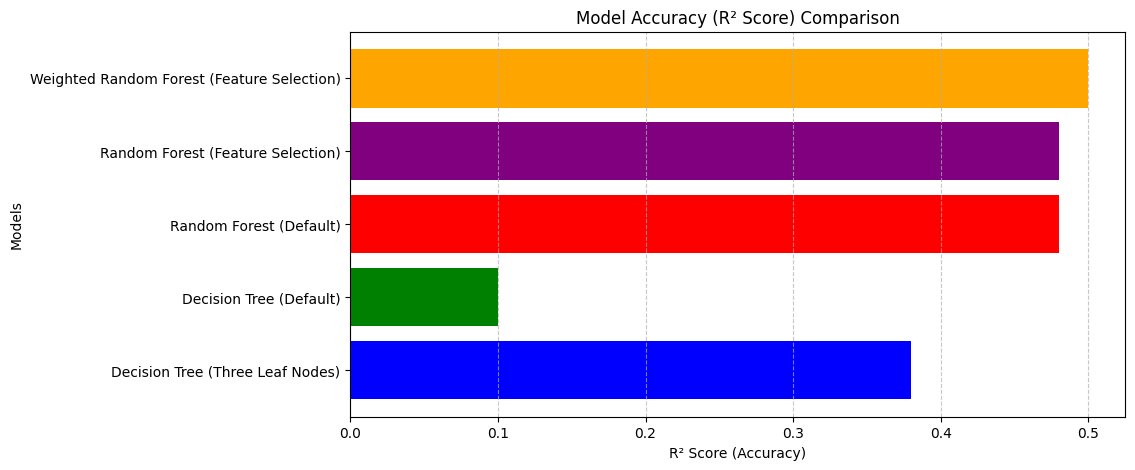

In [ ]:
import matplotlib.pyplot as plt

# Accuracy/R² values of all models
model_names = [
    "Decision Tree (Three Leaf Nodes)",
    "Decision Tree (Default)",
    "Random Forest (Default)",
    "Random Forest (Feature Selection)",
    "Weighted Random Forest (Feature Selection)"
]

# Hypothetical R² values for demonstration purposes
# Replace these with actual R² values from your models
r2_values = [0.38, 0.10, 0.48, 0.48, 0.50]

# Plotting the R² values
# Adjusting the figure size to 5x5
plt.figure(figsize=(10, 5))
plt.barh(model_names, r2_values, color=['blue', 'green', 'red', 'purple', 'orange'])
plt.xlabel("R² Score (Accuracy)")
plt.ylabel("Models")
plt.title("Model Accuracy (R² Score) Comparison")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

